In [143]:
import requests
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns

%matplotlib inline

In [119]:
total_confirmed = requests.get('https://covid.ourworldindata.org/data/total_cases.csv')
total_deaths = requests.get('https://covid.ourworldindata.org/data/total_deaths.csv')
new_confirmed = requests.get('https://covid.ourworldindata.org/data/new_cases.csv')
new_deaths = requests.get('https://covid.ourworldindata.org/data/new_deaths.csv')
full_dataset = requests.get('https://covid.ourworldindata.org/data/full_data.csv')

In [120]:
with open('./total_confirmed.csv', 'wb') as f:
    f.write(total_confirmed.content)
    
with open('./total_deaths.csv', 'wb') as f:
    f.write(total_deaths.content)
    
with open('./new_confirmed.csv', 'wb') as f:
    f.write(new_confirmed.content)
    
with open('./new_deaths.csv', 'wb') as f:
    f.write(new_deaths.content)
    
with open('./full_dataset.csv', 'wb') as f:
    f.write(full_dataset.content)

In [121]:
full_dataset = pd.read_csv('full_dataset.csv', parse_dates=['date'])
full_dataset.head()

,date,location,new_cases,new_deaths,total_cases,total_deaths
0,2020-02-25,Afghanistan,NaN,NaN,1,NaN
1,2020-02-26,Afghanistan,0.0,NaN,1,NaN
2,2020-02-27,Afghanistan,0.0,NaN,1,NaN
3,2020-02-28,Afghanistan,0.0,NaN,1,NaN
4,2020-02-29,Afghanistan,0.0,NaN,1,NaN


In [122]:
full_dataset = full_dataset.fillna(0)
full_dataset.head()

,date,location,new_cases,new_deaths,total_cases,total_deaths
0,2020-02-25,Afghanistan,0.0,0.0,1,0.0
1,2020-02-26,Afghanistan,0.0,0.0,1,0.0
2,2020-02-27,Afghanistan,0.0,0.0,1,0.0
3,2020-02-28,Afghanistan,0.0,0.0,1,0.0
4,2020-02-29,Afghanistan,0.0,0.0,1,0.0


In [31]:
full_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2407 entries, 0 to 2406
Data columns (total 6 columns):
date            2407 non-null datetime64[ns]
location        2407 non-null object
new_cases       2407 non-null float64
new_deaths      2407 non-null float64
total_cases     2407 non-null int64
total_deaths    2407 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 113.0+ KB


In [32]:
full_dataset.describe()

,new_cases,new_deaths,total_cases,total_deaths
count,2407.000000,2407.000000,2407.000000,2407.000000
mean,118.019942,4.441213,2583.628583,82.328209
std,757.346030,24.471873,13551.360762,462.077623
min,-10.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,2.000000,0.000000
50%,0.000000,0.000000,8.000000,0.000000
75%,5.000000,0.000000,36.500000,0.000000
max,19572.000000,434.000000,142539.000000,5393.000000


In [109]:
full_dataset = full_dataset.sort_values(['date', 'total_cases'])

In [123]:
full_dataset[full_dataset.total_cases == full_dataset.total_cases.max()]

,date,location,new_cases,new_deaths,total_cases,total_deaths
2552,2020-03-15,World,10968.0,343.0,153523,5736.0


In [124]:
world_dataset = full_dataset[full_dataset.location == 'World']
full_dataset = full_dataset[full_dataset.location != 'World']

In [125]:
full_dataset[full_dataset.total_cases == full_dataset.total_cases.max()]

,date,location,new_cases,new_deaths,total_cases,total_deaths
495,2020-03-15,China,27.0,10.0,81048,3204.0


## Worldwide Corona cases 

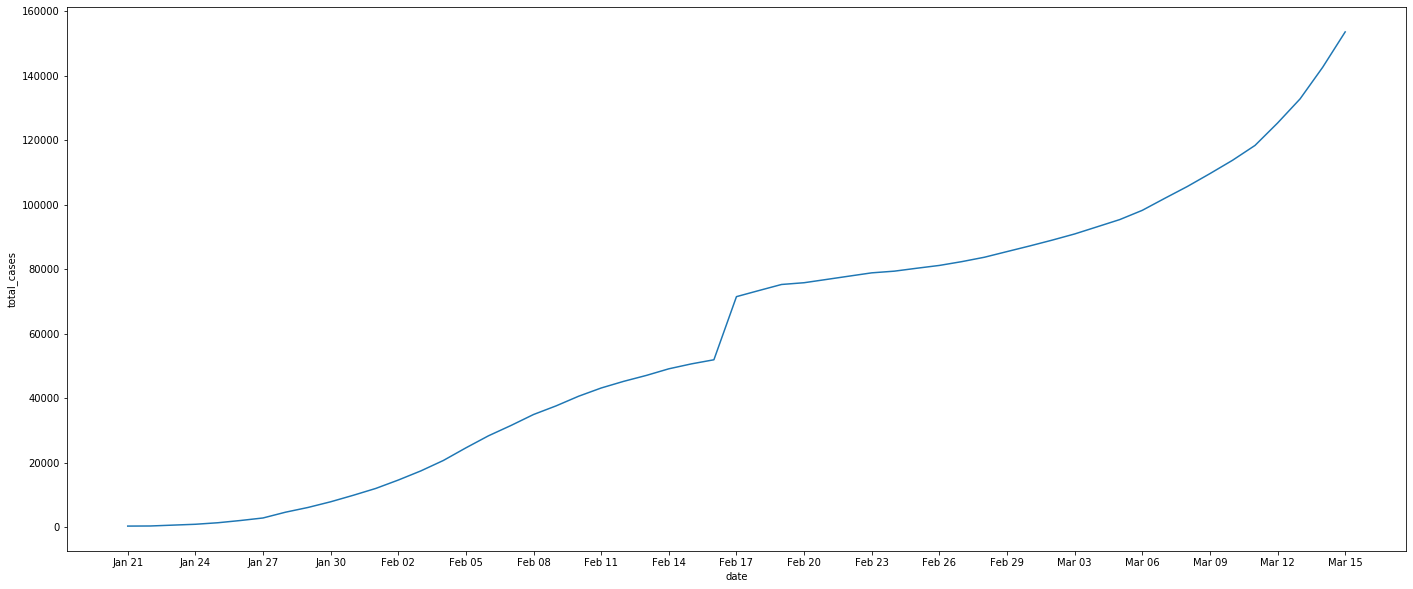

In [166]:
plt.figure(figsize = (24, 10))

ax = sns.lineplot(x="date", y="total_cases", markers=True, data=world_dataset)
ax.xaxis_date()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.xaxis.set_major_formatter(DateFormatter('%b %d'))


In [114]:
no_china_dataset = full_dataset[full_dataset.location != 'China']

In [340]:
highest_countries = no_china_dataset.nlargest(4, ['date', 'total_cases']).reset_index()
highest_countries

,index,date,location,new_cases,new_deaths,total_cases,total_deaths
0,1085,2020-03-14,Italy,2547.0,252.0,17660,1268.0
1,986,2020-03-14,Iran,1289.0,85.0,11364,514.0
2,1701,2020-03-14,South Korea,107.0,6.0,8086,72.0
3,1961,2020-03-14,Spain,1266.0,36.0,4231,120.0


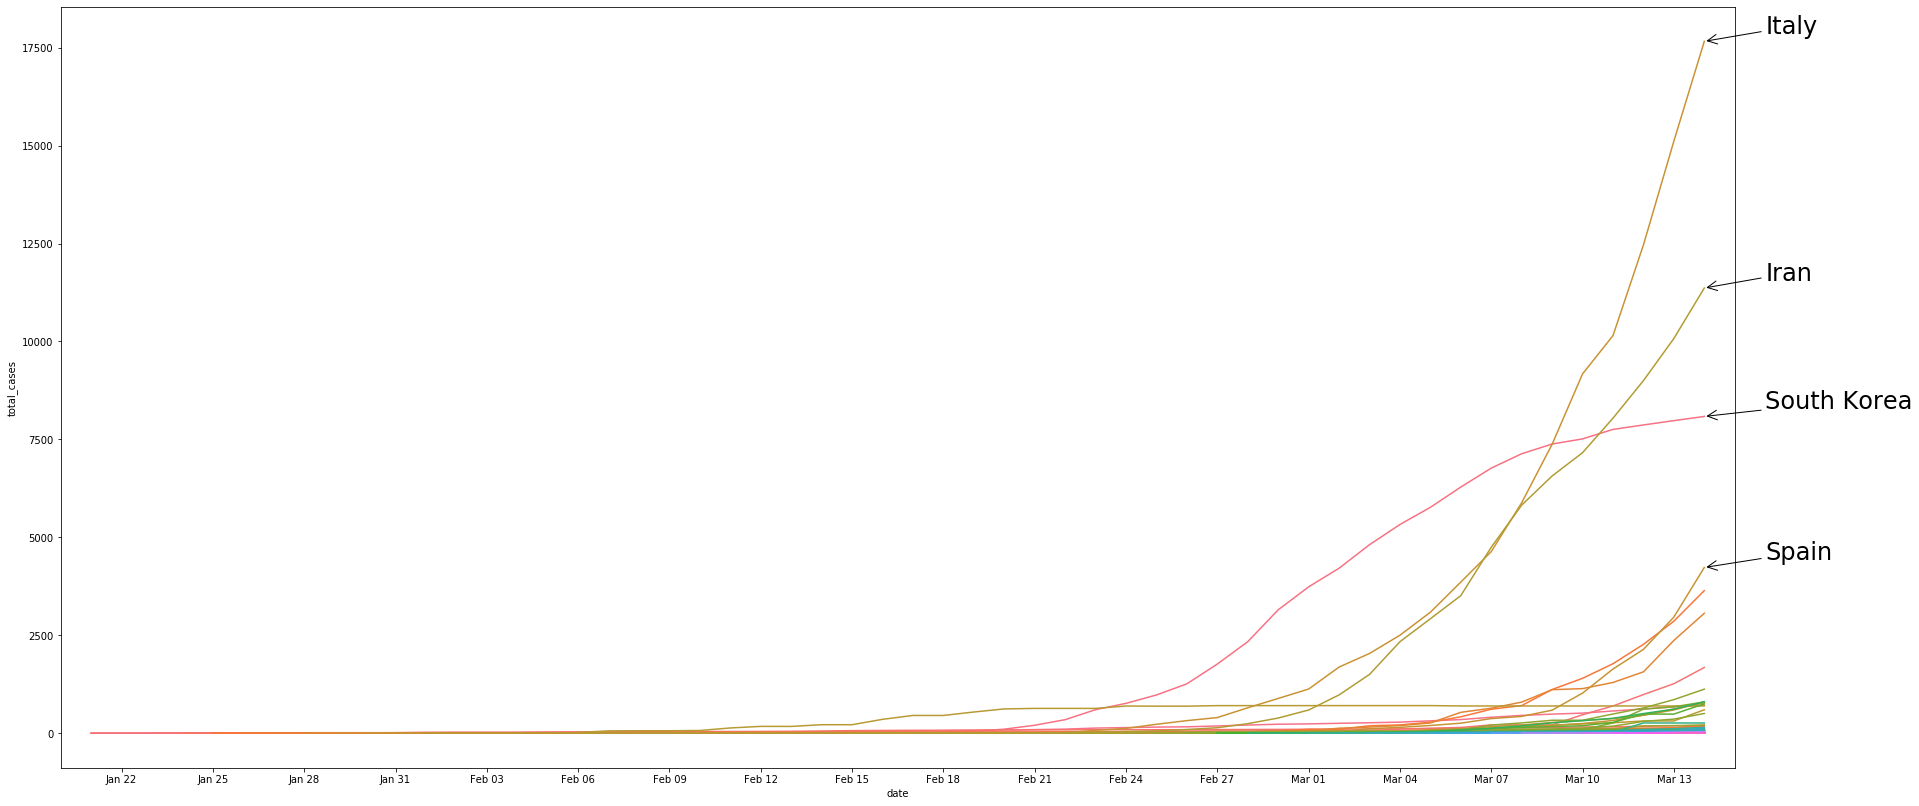

In [266]:

plt.figure(figsize = (30, 14))

ax = sns.lineplot(x="date", y="total_cases", hue="location", legend=False,  data=no_china_dataset)

ax.xaxis_date()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.xaxis.set_major_formatter(DateFormatter('%b %d'))

ax.set_xlim([no_china_dataset.date.min() - datetime.timedelta(days=1), no_china_dataset.date.max() + datetime.timedelta(days=1)])

for i in range(4):
    ax.annotate(highest_countries.iloc[i].location, 
                xy=(no_china_dataset.date.max(), highest_countries.iloc[i].total_cases), fontsize=24,
                xytext=(no_china_dataset.date.max() + datetime.timedelta(days=2),
                        highest_countries.iloc[i].total_cases + 200), 
                arrowprops=dict(facecolor='black', arrowstyle="->"));



In [292]:
highest_countries_last_week

,index,date,location,new_cases,new_deaths,total_cases,total_deaths
0,1693,2020-03-06,South Korea,518.0,7.0,6284,42.0
1,1077,2020-03-06,Italy,769.0,41.0,3858,148.0
2,978,2020-03-06,Iran,591.0,15.0,3513,107.0
3,954,2020-03-06,International,-10.0,0.0,696,6.0


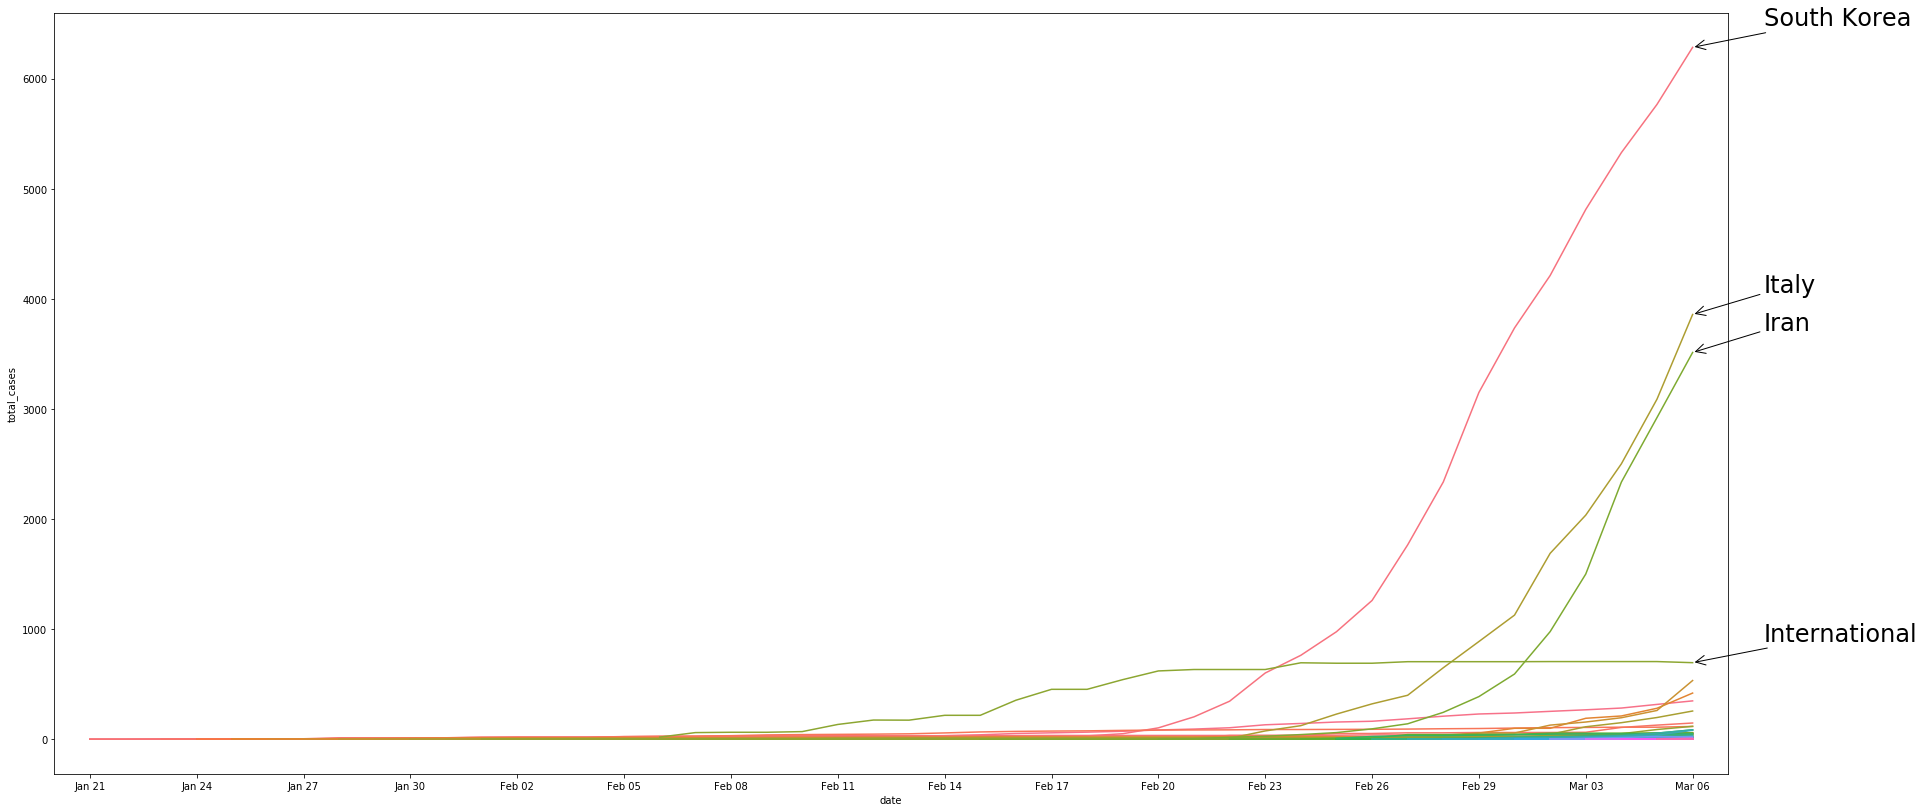

In [290]:
plt.figure(figsize = (30, 14))

one_week_ago = no_china_dataset[no_china_dataset.date < '2020-03-7']
highest_countries_last_week = one_week_ago.nlargest(4, ['date', 'total_cases']).reset_index()
highest_countries_last_week

ax = sns.lineplot(x="date", y="total_cases", hue="location", legend=False,  data=one_week_ago)

ax.xaxis_date()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.xaxis.set_major_formatter(DateFormatter('%b %d'))

ax.set_xlim([one_week_ago.date.min() - datetime.timedelta(days=1), one_week_ago.date.max() + datetime.timedelta(days=1)])

for i in range(4):
    ax.annotate(highest_countries_last_week.iloc[i].location, 
                xy=(one_week_ago.date.max(), highest_countries_last_week.iloc[i].total_cases), fontsize=24,
                xytext=(one_week_ago.date.max() + datetime.timedelta(days=2),
                        highest_countries_last_week.iloc[i].total_cases + 200), 
                arrowprops=dict(facecolor='black', arrowstyle="->"));

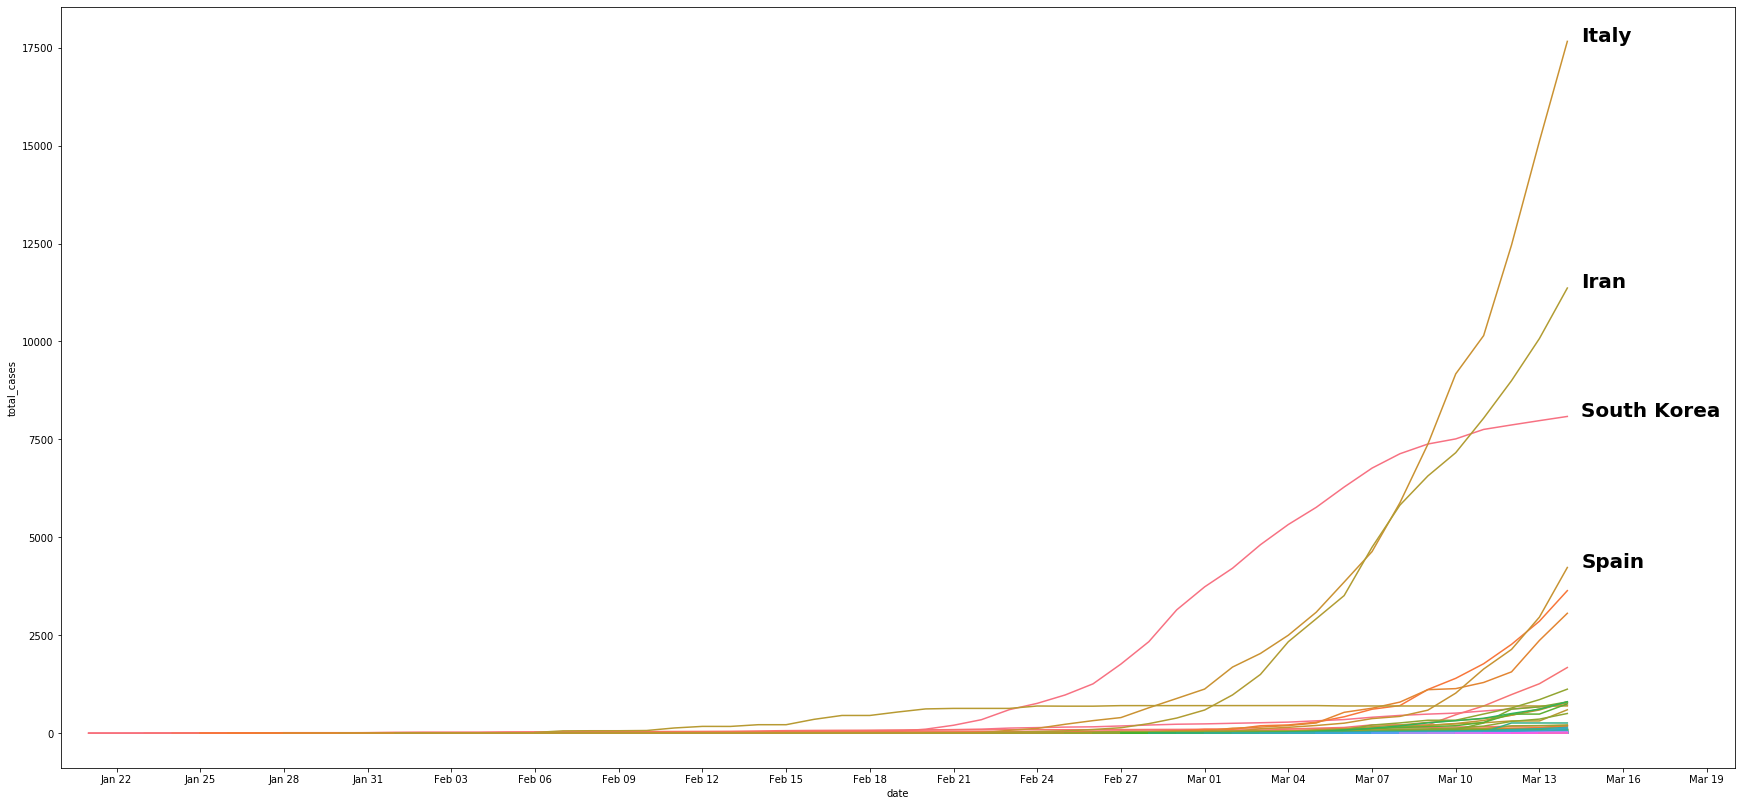

In [286]:
plt.figure(figsize = (30, 14))


ax = sns.lineplot(x="date", y="total_cases", hue="location", legend=False,  data=no_china_dataset)

ax.xaxis_date()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.xaxis.set_major_formatter(DateFormatter('%b %d'))

ax.set_xlim([no_china_dataset.date.min() - datetime.timedelta(days=1), no_china_dataset.date.max() + datetime.timedelta(days=6)])


for line in range(0,highest_countries.shape[0]):
     ax.text(highest_countries.date[line] + datetime.timedelta(days=0.5), highest_countries.total_cases[line], highest_countries.location[line], horizontalalignment='left', size='20', color='black', weight='bold')
        


In [323]:
no_outliers = no_china_dataset[~ no_china_dataset.location.isin(highest_countries.location)]
highest_no_outliers = no_outliers.nlargest(10, ['date', 'total_cases']).reset_index()
highest_no_outliers

,index,date,location,new_cases,new_deaths,total_cases,total_deaths
0,720,2020-03-14,France,780.0,18.0,3640,79.0
1,795,2020-03-14,Germany,693.0,0.0,3062,6.0
2,2300,2020-03-14,United States,414.0,5.0,1678,41.0
3,2070,2020-03-14,Switzerland,267.0,0.0,1125,6.0
4,1433,2020-03-14,Netherlands,190.0,5.0,804,10.0
5,2167,2020-03-14,United Kingdom,208.0,2.0,802,10.0
6,544,2020-03-14,Denmark,127.0,0.0,801,0.0
7,2052,2020-03-14,Sweden,155.0,0.0,775,0.0
8,1499,2020-03-14,Norway,261.0,0.0,750,1.0
9,1143,2020-03-14,Japan,41.0,2.0,716,21.0


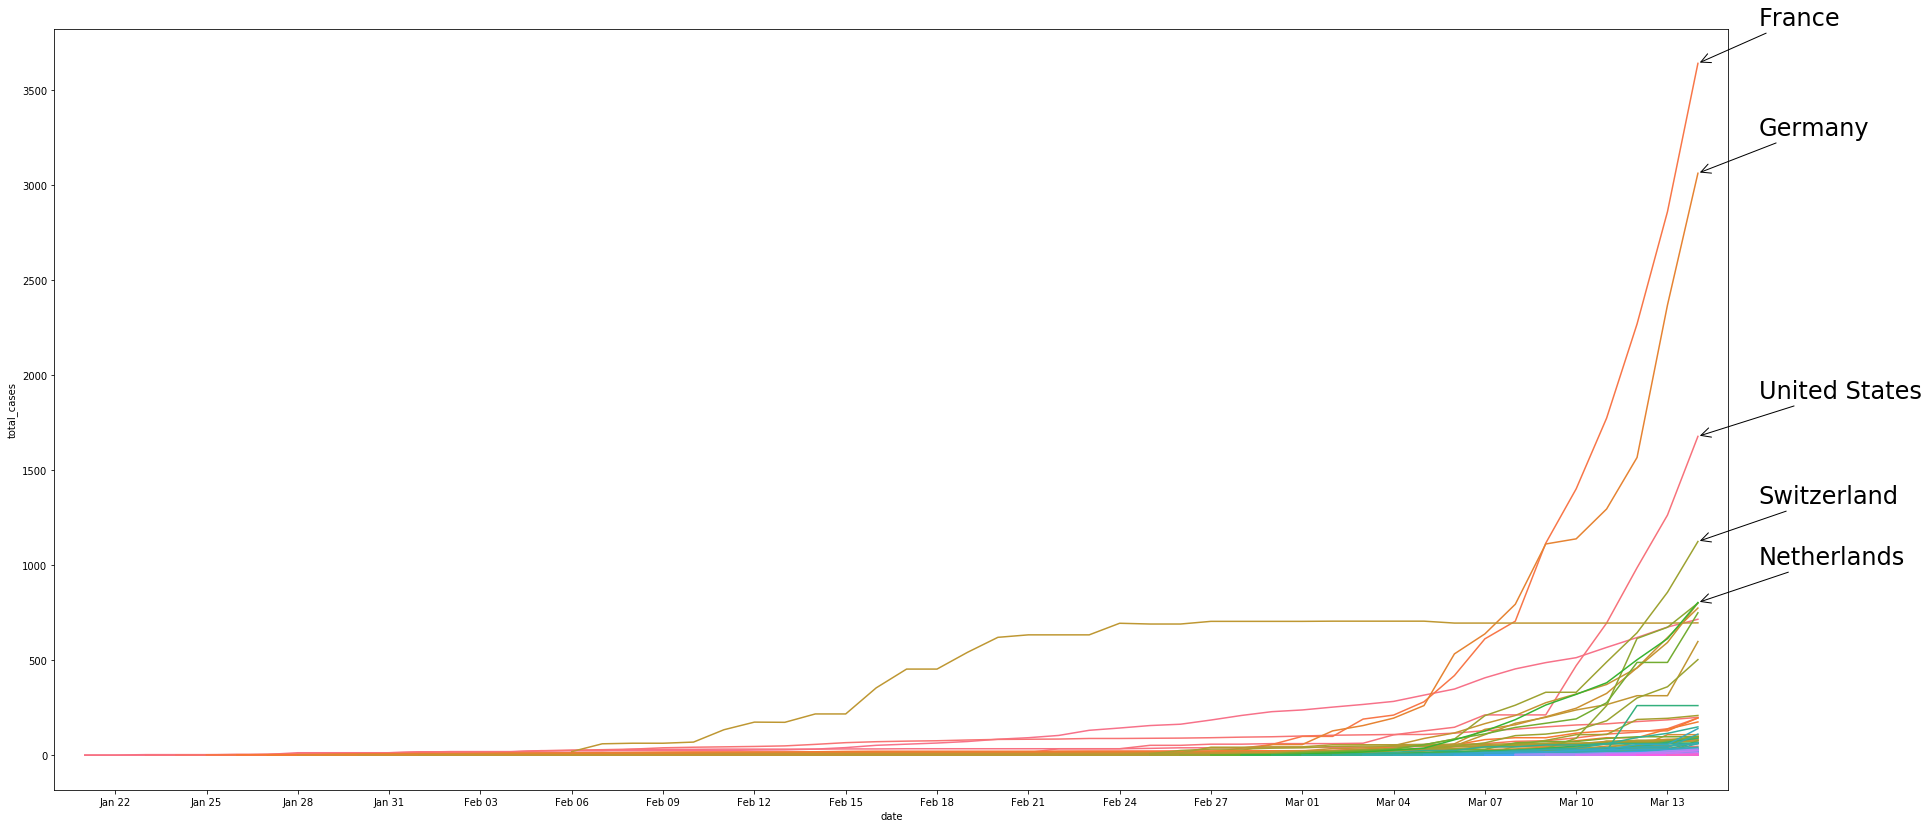

In [310]:
plt.figure(figsize = (30, 14))

ax = sns.lineplot(x="date", y="total_cases", hue="location", legend=False,  data=no_outliers)

ax.xaxis_date()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.xaxis.set_major_formatter(DateFormatter('%b %d'))

ax.set_xlim([no_outliers.date.min() - datetime.timedelta(days=1), no_outliers.date.max() + datetime.timedelta(days=1)])

for i in range(5):
    ax.annotate(highest_no_outliers.iloc[i].location, 
                xy=(no_outliers.date.max(), highest_no_outliers.iloc[i].total_cases), fontsize=24,
                xytext=(no_outliers.date.max() + datetime.timedelta(days=2),
                        highest_no_outliers.iloc[i].total_cases + 200), 
                arrowprops=dict(facecolor='black', arrowstyle="->"));



# Weather Data

In [330]:
china = pd.read_csv('China.csv')
china.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,2020-01-22 00:00:00,7,-1,0.0,8.7,1,1,11,05:14 AM,02:51 PM,...,-1,6,6,37,0.0,1025,1,10,4,5
1,2020-01-22 12:00:00,7,-1,0.0,8.7,1,1,11,05:14 AM,02:51 PM,...,4,4,2,31,0.0,1024,4,10,55,3
2,2020-01-23 00:00:00,7,1,0.0,8.7,1,1,3,06:13 AM,03:44 PM,...,1,5,18,43,0.0,1026,1,10,241,3
3,2020-01-23 12:00:00,7,1,0.0,8.7,1,1,3,06:13 AM,03:44 PM,...,4,12,1,37,0.0,1030,6,10,22,10
4,2020-01-24 00:00:00,3,-6,0.0,8.7,1,1,0,07:05 AM,04:40 PM,...,0,7,15,50,0.0,1037,1,10,115,5


In [339]:
saudi = pd.read_csv('saudi.csv')
saudi.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,2020-01-22 00:00:00,22,19,0.0,11.0,1,1,11,04:50 AM,03:57 PM,...,20,39,34,68,0.0,1017,20,10,349,29
1,2020-01-22 12:00:00,22,19,0.0,11.0,1,1,11,04:50 AM,03:57 PM,...,22,35,0,51,0.0,1017,22,10,333,31
2,2020-01-23 00:00:00,23,18,0.0,11.0,1,1,3,05:46 AM,04:51 PM,...,19,33,0,56,0.0,1017,19,10,357,25
3,2020-01-23 12:00:00,23,18,0.0,11.0,1,1,3,05:46 AM,04:51 PM,...,21,23,0,34,0.0,1018,21,10,322,20
4,2020-01-24 00:00:00,23,18,0.0,11.0,1,1,0,06:38 AM,05:46 PM,...,20,33,0,46,0.0,1019,20,10,355,24
